<a href="https://colab.research.google.com/github/araveend/ml_employee_turnover/blob/main/Employee_Trurnover_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Employee Turnover Analytics**

---





Project Statement:
Portobello Tech is an app innovator who has devised an intelligent way of
predicting employee turnover within the company. It periodically evaluates
employees' work details, including the number of projects they worked on,
average monthly working hours, time spent in the company, promotions in the
last five years, and salary level.
Data from prior evaluations shows the employees’ satisfaction in the workplace.
The data could be used to identify patterns in work style and their interest in
continuing to work for the company.  
The HR Department owns the data and uses it to predict employee turnover.
Employee turnover refers to the total number of workers who leave a company
over time.



1.  Perform data quality checks by checking for missing values, if any.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


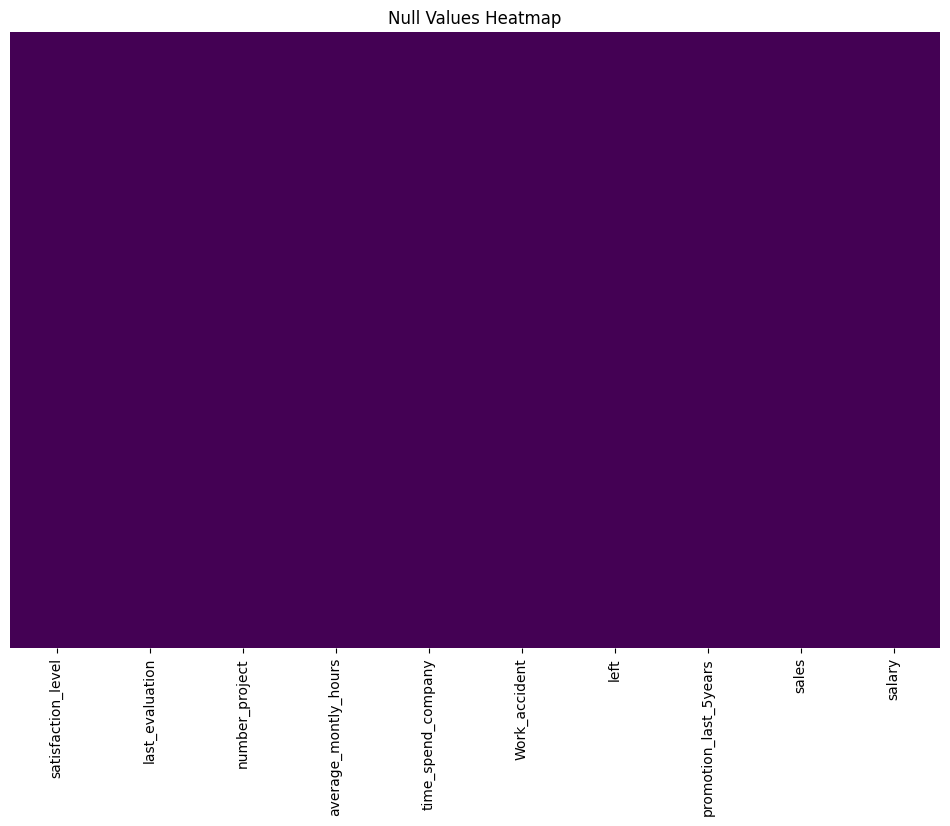

In [ ]:
print(df.isnull().sum())

# Create a heatmap of null values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', xticklabels=df.columns, yticklabels=False)

# Show the plot
plt.title('Null Values Heatmap')
plt.show()


2. Perform data quality checks by checking for missing values, if any.
Understand what factors contributed most to employee turnover at EDA.

    2.1. Draw a heatmap of the correlation matrix between all numerical
    features or columns in the data.

In [ ]:
df_corr = df[['satisfaction_level', 'last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','left','promotion_last_5years']]

<Axes: >

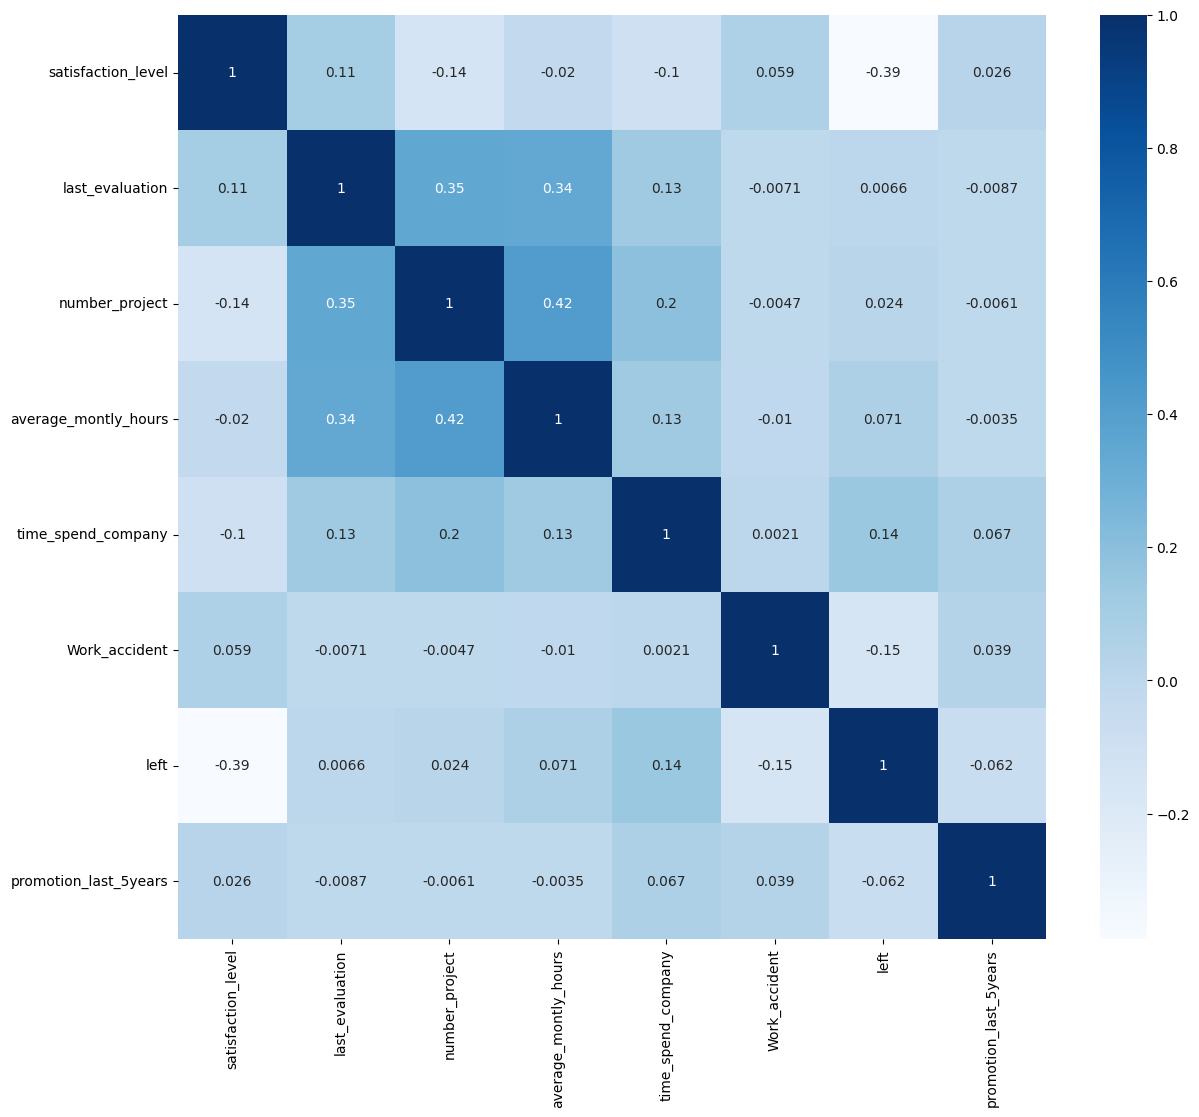

In [ ]:
plt.figure(figsize=(14,12))
sns.heatmap(df_corr.corr(),annot=True,cmap='Blues')

2.2. Draw the distribution plot of:

    *   Employee Satisfaction (use column satisfaction_level)
    *   Employee Evaluation (use column last_evaluation)
    *   Employee Average Monthly Hours (use column
         average_montly_hours)



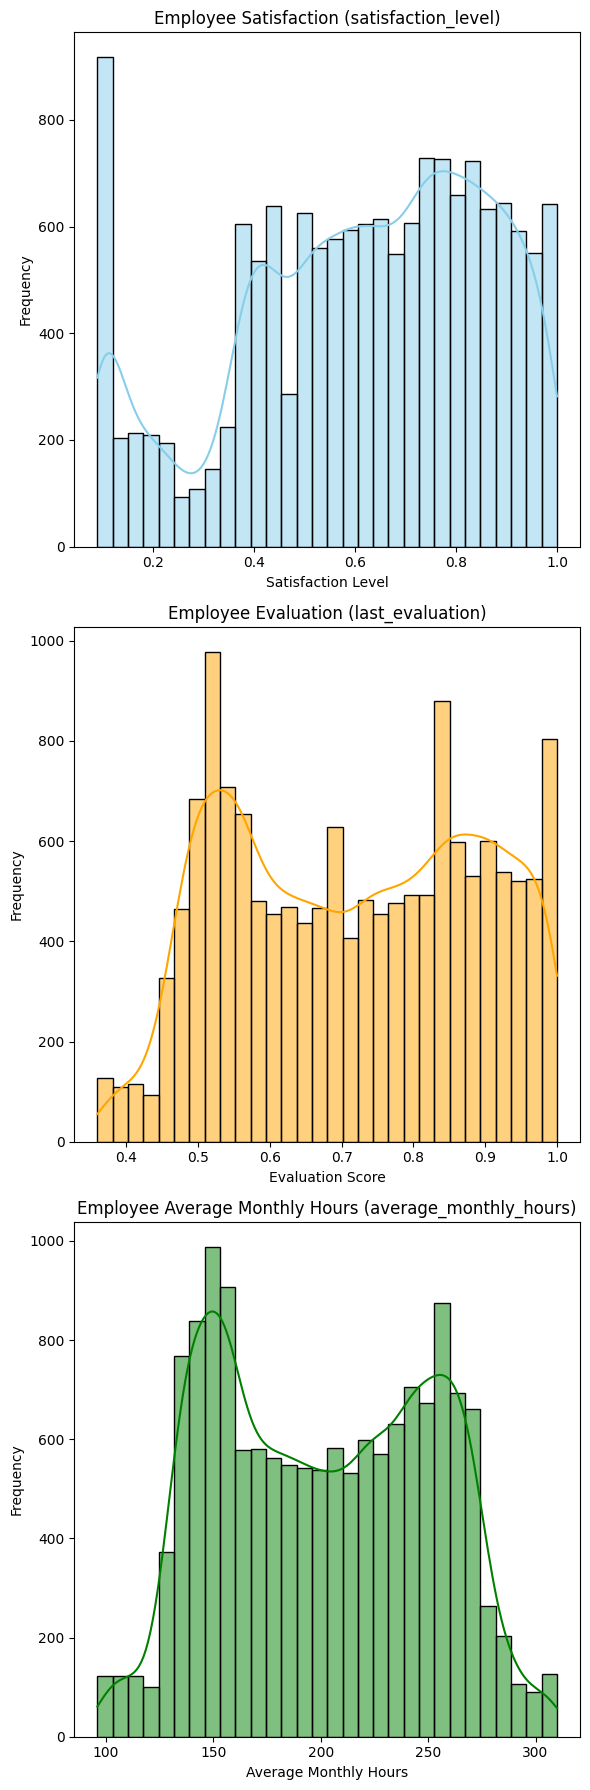

In [ ]:
# Set the size of the figure
plt.figure(figsize=(6, 18))

# Plot for Employee Satisfaction (satisfaction_level)
plt.subplot(3, 1, 1)  # 3 rows, 1 column, first plot
sns.histplot(df['satisfaction_level'], kde=True, color='skyblue', bins=30)
plt.title('Employee Satisfaction (satisfaction_level)')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')

# Plot for Employee Evaluation (last_evaluation)
plt.subplot(3, 1, 2)  # 3 rows, 1 column, second plot
sns.histplot(df['last_evaluation'], kde=True, color='orange', bins=30)
plt.title('Employee Evaluation (last_evaluation)')
plt.xlabel('Evaluation Score')
plt.ylabel('Frequency')

# Plot for Employee Average Monthly Hours (average_monthly_hours)
plt.subplot(3, 1, 3)  # 3 rows, 1 column, third plot
sns.histplot(df['average_montly_hours'], kde=True, color='green', bins=30)
plt.title('Employee Average Monthly Hours (average_monthly_hours)')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()



2.3.  Draw the bar plot of the employee project count of both employees
who left and stayed in the organization (use column number_project
and hue column left), and give your inferences from the plot.





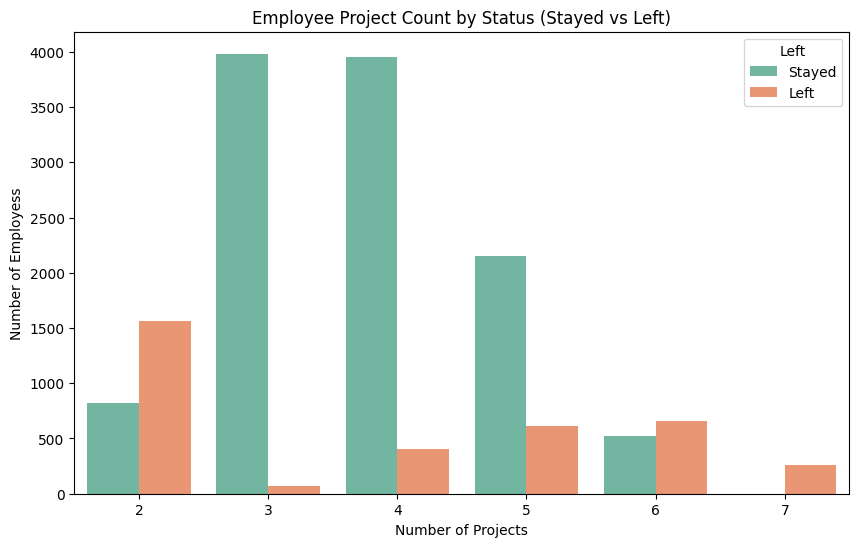

In [ ]:


# Set the size of the figure
plt.figure(figsize=(10, 6))

# Create a bar plot with the number of projects on the x-axis and hue based on whether the employee left or stayed
sns.countplot(x='number_project', hue='left', data=df,  palette='Set2')

# Set plot titles and labels
plt.title('Employee Project Count by Status (Stayed vs Left)')
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employess')
plt.legend(title='Left', loc='upper right', labels=['Stayed', 'Left'])

# Display the plot
plt.show()


**Observations:**

1.   Employees with 3 or 4 projects are the most stable
2.   A significant number of employees with 3 or 4 projects stayed with the   company.Very few employees who left had 3 or 4 projects.Higher attrition for employees with 2 projects.
3. A noticeable number of employees with only 2 projects left the company.
The number of those who left is greater than those who stayed. Attrition increases for employees with 5 or more projects
4. The number of employees leaving increases for those who handled 5 or more projects.
This suggests that workload may have contributed to employee attrition.
**Possible Inferences:**
Balanced workload (3–4 projects) results in higher retention.
Too few projects (2) or too many projects (5+) may lead to higher attrition.
Overburdening employees with excessive projects (5, 6, or 7) could be a reason for leaving.

3. Perform clustering of employees who left based on their satisfaction and
evaluation.

      3.1. Choose columns satisfaction_level, last_evaluation, and left.


In [ ]:
from sklearn.cluster import KMeans
df_left = df[df['left'] == 1].copy()  # Avoid modifying original DataFrame
X = df_left[['satisfaction_level', 'last_evaluation']]



       3.2. Do K-means clustering of employees who left the company into 3 clusters?

In [ ]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
df_left.loc[:, 'cluster'] = kmeans.fit_predict(X)

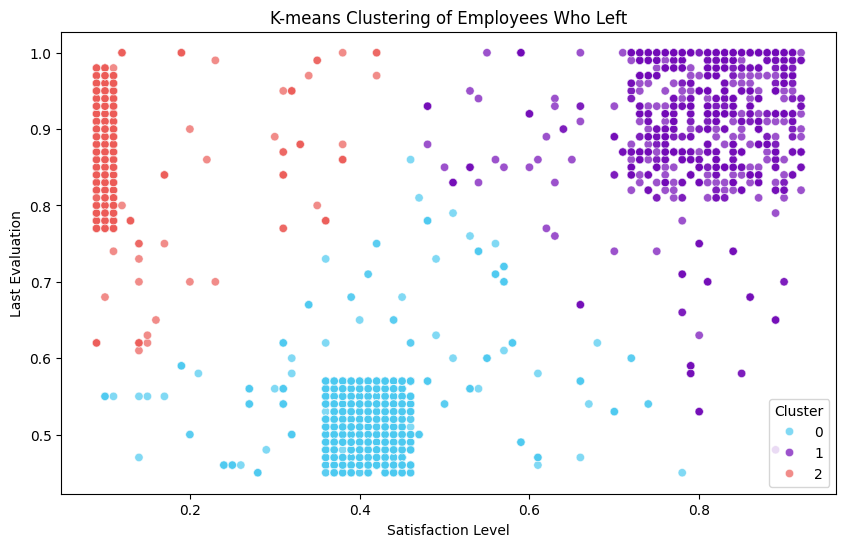

In [ ]:
plt.figure(figsize=(10, 6))

# Define a color palette
colors = ['#4CC9F0', '#7209B7', '#EC5B57']

sns.scatterplot(
    x=df_left['satisfaction_level'],
    y=df_left['last_evaluation'],
    hue=df_left['cluster'],
    palette=colors,
    alpha=0.7  )

plt.title('K-means Clustering of Employees Who Left')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.legend(title='Cluster',loc='lower right')
plt.show()

 3.3. Based on the satisfaction and evaluation factors, give your thoughts
      on the employee clusters.

Cluster Insights:
  Cluster 0 (Light Blue, Bottom Left) – Low Satisfaction, Low Evaluation

      Employees in this cluster have low satisfaction levels (0.2 - 0.4) and low last evaluation scores (around 0.5 - 0.6).

      These employees may have left due to dissatisfaction and poor performance reviews.

      Possible Reason: Lack of motivation, disengagement, or poor feedback.

  Cluster 1 (Purple, Top Right) – High Satisfaction, High Evaluation

      This group consists of employees with high last evaluation scores (~0.8 - 1.0) and moderate to high satisfaction (0.6 - 0.9).

      Despite being high performers, they still left, possibly due to burnout, lack of career growth, or better opportunities elsewhere.

      Possible Reason: Overwork, lack of recognition, or job market competition.

 Cluster 2 (Red, Top Left) – Low Satisfaction, High Evaluation

      Employees in this cluster have very low satisfaction levels (~0.1 - 0.2) but high last evaluation scores (~0.8 - 1.0).

      These employees might have been overworked or underappreciated, leading to resignation.

      Possible Reason: Stress, high workload, or toxic work culture.


  Two major reasons for attrition:

      Low satisfaction and poor performance → disengagement & lack of motivation.

      High performance but low satisfaction → burnout & lack of career growth.
  
       Employees with high evaluations but low satisfaction (Cluster 2) are at risk of leaving.

 Preventative Measures:

      For Cluster 0: Improve job engagement, provide better training & mentorship.
      For Cluster 1 & 2: Focus on work-life balance, career growth, and recognition.

4. Handle the left Class Imbalance using the SMOTE technique.
        4.1. Pre-process the data by converting categorical columns to numerical columns by:
            *  Separating categorical variables and numeric variables
            *  Applying get_dummies() to the categorical variables
            *  Combining categorical variables and numeric variables






      

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import confusion_matrix,classification_report, roc_curve, auc,roc_auc_score


In [ ]:
#categorical_cols = df.select_dtypes(include=['object']).columns  # Categorical columns
#df =  pd.get_dummies(df, categorical_cols, drop_first=True)
#df.info()

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('left')  # Remove target variable



        4.2 Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80% train, 20% test)
X = df.drop(columns=['left'])  # Features
y = df['left']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)



      4.3. Upsample the train dataset using the SMOTE technique from the imblearn module.

In [ ]:
from imblearn.over_sampling import SMOTE

# Define preprocessing steps
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),  # Scale numerical features
    ('cat', OneHotEncoder(drop='first'), categorical_cols)  # One-hot encode categorical features
])

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=123),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=123),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=123)
}




5. Perform 5-fold cross-validation model training and evaluate performance.
        5.1. Train a logistic regression model, apply a 5-fold CV, and plot the classification report.
        5.2  Train a Random Forest Classifier model, apply the 5-fold CV, and plot the classification report.
        5.3 Train a Gradient Boosting Classifier model, apply the 5-fold CV, and plot the classification report.


🔹 Training Model: Logistic Regression
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.75      0.82     11428
           1       0.50      0.80      0.61      3571

    accuracy                           0.76     14999
   macro avg       0.71      0.77      0.72     14999
weighted avg       0.82      0.76      0.77     14999



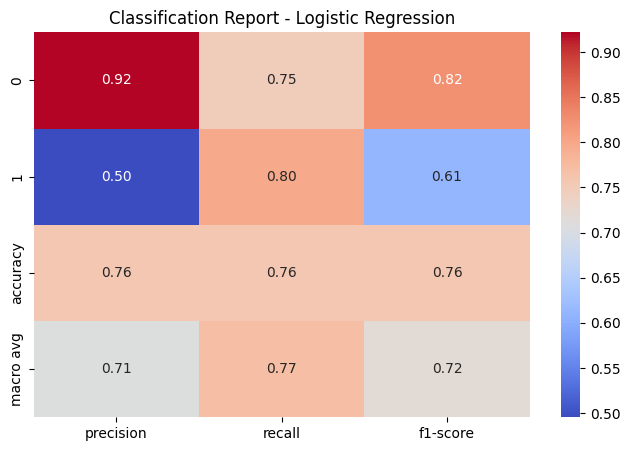


🔹 Training Model: Random Forest
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     11428
           1       0.99      0.97      0.98      3571

    accuracy                           0.99     14999
   macro avg       0.99      0.98      0.99     14999
weighted avg       0.99      0.99      0.99     14999



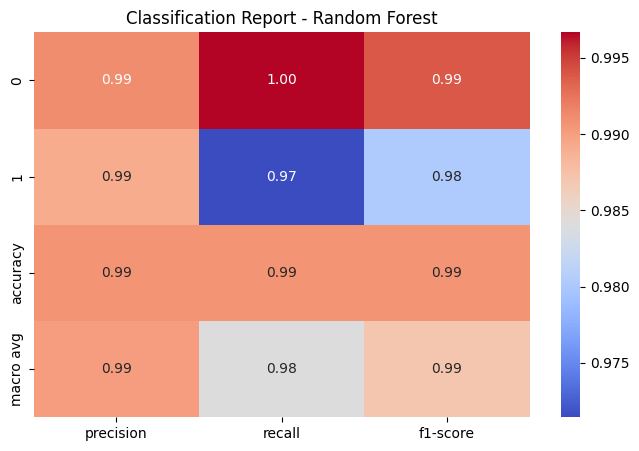


🔹 Training Model: Gradient Boosting
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     11428
           1       0.93      0.94      0.93      3571

    accuracy                           0.97     14999
   macro avg       0.95      0.96      0.96     14999
weighted avg       0.97      0.97      0.97     14999



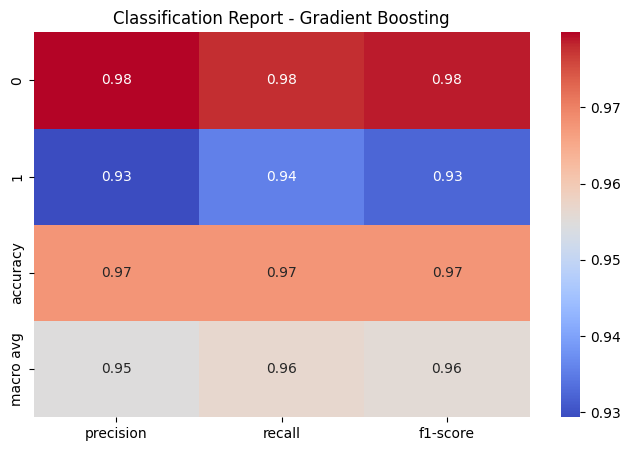

In [ ]:
# Define stratified 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)



# Function to train models and display reports
def train_and_evaluate(models, X,y, cv):
    for name, model in models.items():
        print(f"\n🔹 Training Model: {name}")

        # Create pipeline
        pipeline = ImbPipeline([
            ('preprocessor', preprocessor),
            ('smote', SMOTE(random_state=123)),  # Handle class imbalance
            ('classifier', model)
        ])

        # Perform cross-validation and get predictions
        y_pred_cv = cross_val_predict(pipeline, X, y, cv=cv)





        # Print classification report
        report = classification_report(y, y_pred_cv)
        print("Classification Report:\n", report)

        # Plot classification report as heatmap
        plot_classification_report(name,y,y_pred_cv)


# Function to plot classification report heatmap
def plot_classification_report(model_name,y,y_pred_cv):
    report_dict = classification_report(y, y_pred_cv, output_dict=True)
    report_df = pd.DataFrame(report_dict).T
    plt.figure(figsize=(8, 5))
    sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Classification Report - {model_name}")
    plt.show()




# Train models and evaluate performance
train_and_evaluate(models,X,y, cv)


6. Identify the best model and justify the evaluation metrics used.
        6.1. Find the ROC/AUC for each model and plot the ROC curve.

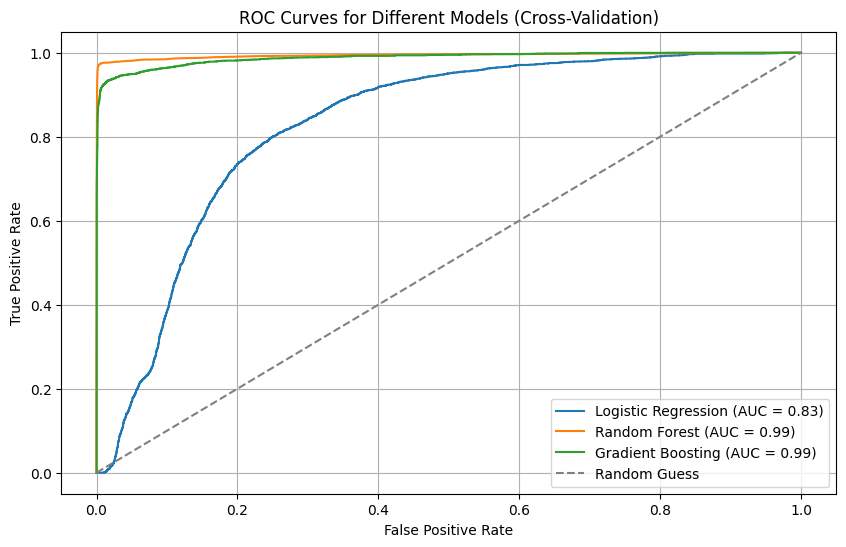

In [ ]:


# Plot ROC Curves for all models in a single diagram
plt.figure(figsize=(10, 6))

for name, model in models.items():
    pipeline = ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),  # Handle class imbalance
        ('classifier', model)
    ])

    # Use cross_val_predict to get probability predictions
    y_pred_proba = cross_val_predict(pipeline, X, y, cv=cv, method="predict_proba")[:, 1]  # Get probability for class 1

    # Compute ROC Curve and AUC
    fpr, tpr, _ = roc_curve(y, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC Curve for each model
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot diagonal random classifier line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")

# Format the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Different Models (Cross-Validation)")
plt.legend(loc="lower right")
plt.grid(True)

# Show the plot
plt.show()


      6.2  Find the confusion matrix for each of the models.

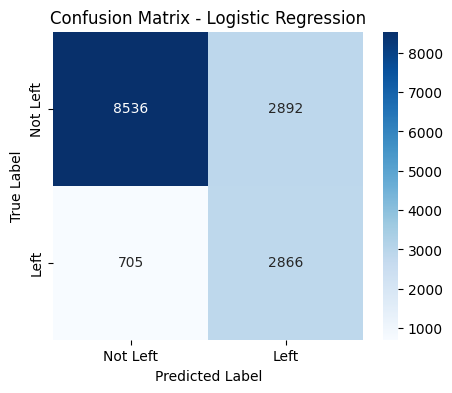

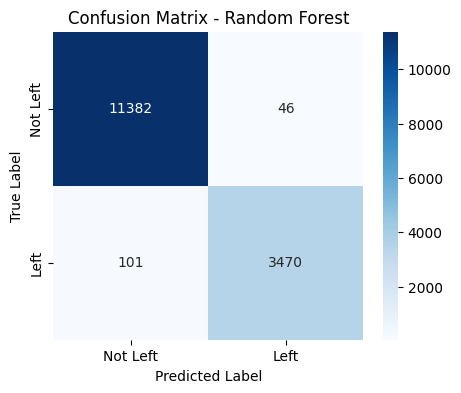

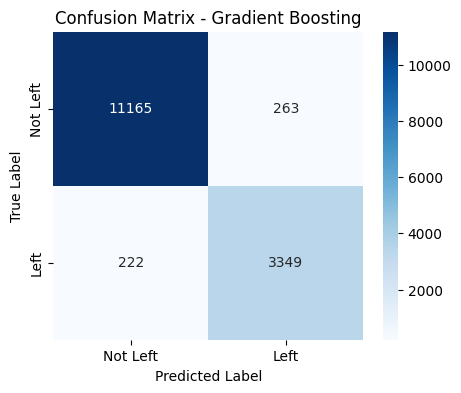

In [ ]:
# Function to plot Confusion Matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=['Not Left', 'Left'], yticklabels=['Not Left', 'Left'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

  # Compute and plot confusion matrix for each model
for name, model in models.items():
    pipeline = ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),  # Handle class imbalance
        ('classifier', model)
    ])

    # Use cross_val_predict to get predicted labels
    y_pred_cv = cross_val_predict(pipeline, X, y, cv=cv)

    # Compute Confusion Matrix
    cm = confusion_matrix(y, y_pred_cv)

    # Plot Confusion Matrix
    plot_confusion_matrix(cm, name)

      6.3 Explain which metric needs to be used from the confusion matrix: Recall or Precision?

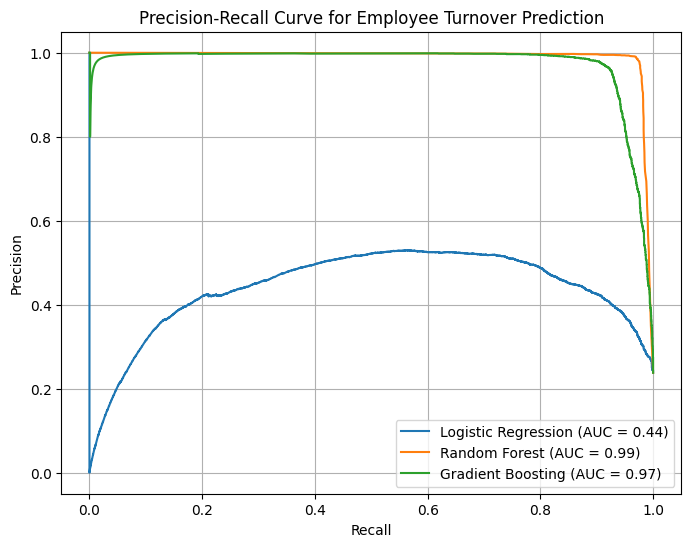

In [ ]:
from sklearn.metrics import precision_recall_curve, auc


plt.figure(figsize=(8, 6))

# Loop through each model and plot the Precision-Recall Curve
for name, model in models.items():
    pipeline = ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),  # Handle class imbalance
        ('classifier', model)
    ])

    # Perform cross-validation predictions
    y_pred_proba = cross_val_predict(pipeline, X, y, cv=5, method="predict_proba")[:, 1]

    # Compute precision-recall values
    precision, recall, _ = precision_recall_curve(y, y_pred_proba)

    # Compute AUC score
    pr_auc = auc(recall, precision)

    # Plot PR Curve
    plt.plot(recall, precision, label=f"{name} (AUC = {pr_auc:.2f})")

# Formatting the plot
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Employee Turnover Prediction")
plt.legend(loc="best")
plt.grid()
plt.show()


For employee turnover prediction, we care more about Recall because:

*   Recall measures how many actual "leaving" employees were correctly identified.
*   A high Recall ensures that at-risk employees are identified, allowing HR to take action.
*  False negatives (missed resignations) are more costly than false positives.

Why Recall?

*  The primary goal of this model is to identify employees who are likely to leave so that retention strategies can be implemented.
*  If the model fails to detect employees who will leave (False Negatives), the company loses an opportunity to retain valuable talent.
*  A high recall ensures that most employees who are actually leaving are correctly identified, even if it means accepting some false positives (employees predicted to leave but who actually stay).

Precision vs. Recall Tradeoff

Precision would be important if the goal was to minimize unnecessary interventions (e.g., retention bonuses or promotions to employees who weren’t planning to leave).

However, false positives (predicting an employee will leave when they actually won’t) are less costly than false negatives (missing employees who will actually leave).

Thus, recall should be prioritized to catch as many departing employees as possible.

Best Model Based on Recall
  Random Forest Classifier has the highest recall (97%), meaning it is the best model for detecting employees who are likely to leave.

  However, Gradient Boosting (94%) is also strong and may be preferable if it offers better generalization.

  Thus, Random Forest is the best choice if recall is the priority, as it correctly identifies the maximum number of employees at risk of leaving.









7. Suggest various retention strategies for targeted employees.

      7.1. Using the best model, predict the probability of employee turnover
      in the test data.

In [ ]:
best_model = models['Random Forest']  # Assuming Random Forest is the best model

# Transform both training and test data
X_train_preprocessed = preprocessor.transform(X_train)
best_model.fit(X_train_preprocessed, y_train)

X_test_preprocessed = preprocessor.transform(X_test)
y_probabilities = best_model.predict_proba(X_test_preprocessed)[:, 1]
df_test = X_test.copy()
df_test['left_prob'] = y_probabilities

Retention Strategies for Targeted Employees
Based on the best model (Random Forest with the highest recall), we can identify employees at risk of leaving and apply tailored retention strategies.

1. Competitive Compensation & Benefits
Conduct market salary benchmarking and adjust compensation if needed.
Offer performance-based bonuses, stock options, and retention bonuses to high-risk employees.
2. Career Growth & Development
Provide clear career advancement opportunities through internal promotions.
Invest in training, mentorship, and skill development programs.
Create personalized career development plans for employees at risk.
3. Work-Life Balance & Flexible Policies
Offer remote work, hybrid schedules, and flexible hours.
Introduce wellness programs, mental health support, and paid time off.
4. Recognition & Employee Engagement
Implement employee appreciation programs (awards, peer recognition, etc.).
Conduct regular employee feedback surveys and act on concerns.
Organize team-building activities and social events.
5. Improve Workplace Culture & Leadership
Ensure transparent communication from leadership.
Encourage open-door policies and anonymous feedback.
Address toxic work environments or management issues proactively.
6. Job Role & Workload Optimization
Identify employees with high workloads and distribute tasks efficiently.
Offer role rotations or lateral moves to keep work engaging.

7.2. Based on the probability score range below, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone.

    * Safe Zone (Green) (Score < 20%)
    * Low-Risk Zone (Yellow) (20% < Score < 60%)
    * Medium-Risk Zone (Orange) (60% < Score < 90%)
    * High-Risk Zone (Red) (Score > 90%).





In [ ]:
# Define risk categorization
def categorize_risk(prob):
    if prob < 0.2:
        return 'Safe Zone (Green)'
    elif 0.2 <= prob < 0.6:
        return 'Low-Risk Zone (Yellow)'
    elif  prob < 0.9:
        return 'Medium-Risk Zone (Orange)'
    else:
        return 'High-Risk Zone (Red)'

df_test['retention_zone'] = df_test['left_prob'].apply(categorize_risk)

In [ ]:
# Count occurrences of each retention zone
zone_counts = df_test['retention_zone'].value_counts()
print(zone_counts)

retention_zone
Safe Zone (Green)            2265
High-Risk Zone (Red)          647
Low-Risk Zone (Yellow)         45
Medium-Risk Zone (Orange)      43
Name: count, dtype: int64


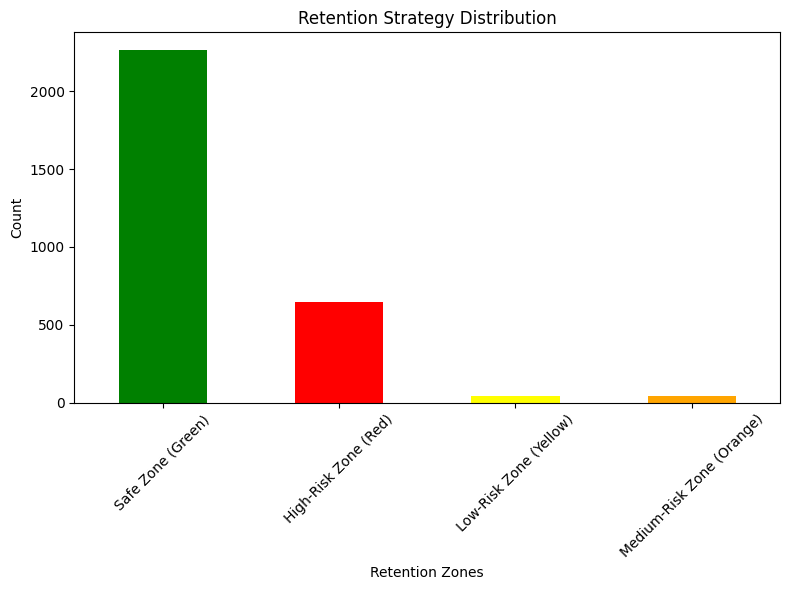

In [ ]:
# Plotting
plt.figure(figsize=(8, 6))
zone_counts.plot(kind='bar', color=['green', 'red',  'yellow','orange'])
plt.title('Retention Strategy Distribution')
plt.xlabel('Retention Zones')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Summary:**

 1. Safe Zone (Green) ~ Score < 20%
     Employees who are highly likely to stay.
    
    Strategy:
      *  Continue current engagement strategies.
      *  Recognize and reward performance regularly.
      *  Maintain transparent communication and career growth discussions.

 2. Low-Risk Zone (Yellow) ~ Score 20% - 60%
      Employees with mild chances of leaving.
    
    Strategy:
     * Provide learning and development programs (training, certifications, mentorship).
      Offer flexible work options (remote work, flexible hours).
     * Conduct stay interviews to understand long-term aspirations.

 3. Medium-Risk Zone (Orange) ~ Score 60% - 90%
    Employees who may leave if not addressed properly.

    Strategy:
      * Conduct one-on-one meetings with managers to understand dissatisfaction.
      * Provide customized career progression plans and role enhancements.
      * Improve work-life balance initiatives.    
      Offer monetary incentives (bonuses, performance-based raises).
 4. High-Risk Zone (Red)  ~ Score > 90%
     Employees who are most likely to leave soon.

     Strategy:
     * Immediate leadership intervention (Senior management involvement).
     * Retention bonus or counter-offers (monetary and non-monetary benefits).
     * Address toxic workplace issues or dissatisfaction reasons directly.
     * Provide fast-track promotions or job rotations to increase motivation.




